In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import spacy

<h1>Web Scrapping</h1>

<h3>Extracting Data From Skytrax website relating to British Airways</h3>

In [2]:
website = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20              
page_size = 100          

reviews = []            
for i in range(1, pages + 1):      

    print(f"Scraping data from Page {i}")

    # Create URL to collect links 
    url = f"{website}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    response = requests.get(url)     # Collect HTML data from this page

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} Total Reviews")

Scraping data from Page 1
   ---> 100 Total Reviews
Scraping data from Page 2
   ---> 200 Total Reviews
Scraping data from Page 3
   ---> 300 Total Reviews
Scraping data from Page 4
   ---> 400 Total Reviews
Scraping data from Page 5
   ---> 500 Total Reviews
Scraping data from Page 6
   ---> 600 Total Reviews
Scraping data from Page 7
   ---> 700 Total Reviews
Scraping data from Page 8
   ---> 800 Total Reviews
Scraping data from Page 9
   ---> 900 Total Reviews
Scraping data from Page 10
   ---> 1000 Total Reviews
Scraping data from Page 11
   ---> 1100 Total Reviews
Scraping data from Page 12
   ---> 1200 Total Reviews
Scraping data from Page 13
   ---> 1300 Total Reviews
Scraping data from Page 14
   ---> 1400 Total Reviews
Scraping data from Page 15
   ---> 1500 Total Reviews
Scraping data from Page 16
   ---> 1600 Total Reviews
Scraping data from Page 17
   ---> 1700 Total Reviews
Scraping data from Page 18
   ---> 1800 Total Reviews
Scraping data from Page 19
   ---> 1900 Total 

Storing Results in Pandas Dataframe

In [3]:
df = pd.DataFrame()               
df["reviews"] = reviews             
df.head()

,reviews
0,✅ Trip Verified | In June my flight was cance...
1,✅ Trip Verified | Ground and cabin crew alway...
2,✅ Trip Verified | My family flew from Washing...
3,✅ Trip Verified | Easy check in a T5. Galleri...
4,"Not Verified | Flight delayed by an hour, it ..."


In [4]:
df.shape

(2000, 1)

<h1> Cleaning The Data </h1>

Removing "|"

In [5]:
#removing trip verified and not verified from the reviews 
df.reviews= df.reviews.str.split('|',expand=True)[1]  
df.head()

,reviews
0,In June my flight was cancelled within three...
1,Ground and cabin crew always provide good cu...
2,My family flew from Washington to London on ...
3,Easy check in a T5. Galleries south and Nort...
4,"Flight delayed by an hour, it happens, no bi..."


Using Regular Expression (re) to remove spaces and non-alphanumeric characters

In [6]:
def clean_review(text):            # Define a function to clean the text
    text = re.sub(r'[^A-Za-z]+', ' ', str(text)) # Replaces all special characters and numericals with blanks and leaving the alphabets
    return text
# Cleaning the text in the review column
df['reviews']= df["reviews"].apply(clean_review)
df.head()

,reviews
0,In June my flight was cancelled within three ...
1,Ground and cabin crew always provide good cus...
2,My family flew from Washington to London on a...
3,Easy check in a T Galleries south and North l...
4,Flight delayed by an hour it happens no biggi...


Changing text to Lower case

In [7]:
df['reviews'] = df['reviews'].str.lower()
df.head()

,reviews
0,in june my flight was cancelled within three ...
1,ground and cabin crew always provide good cus...
2,my family flew from washington to london on a...
3,easy check in a t galleries south and north l...
4,flight delayed by an hour it happens no biggi...


<h1>Data Processing</h1>

Tokenizing The data

In [8]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words("english"))
df["tokenized_reviews"] = df["reviews"].apply(word_tokenize)
df["tokenized_reviews"] = df["tokenized_reviews"].apply(
    lambda tokens: [token for token in tokens if token not in stop_words]
)
print(df.head())

                                             reviews  \
0   in june my flight was cancelled within three ...   
1   ground and cabin crew always provide good cus...   
2   my family flew from washington to london on a...   
3   easy check in a t galleries south and north l...   
4   flight delayed by an hour it happens no biggi...   

                                   tokenized_reviews  
0  [june, flight, cancelled, within, three, hours...  
1  [ground, cabin, crew, always, provide, good, c...  
2  [family, flew, washington, london, british, ai...  
3  [easy, check, galleries, south, north, lounges...  
4  [flight, delayed, hour, happens, biggie, us, c...  


Applying Stemming with porter stemmer

In [10]:
# Stemming using Porter Stemmer
stemmer = PorterStemmer()
df["stemmed_reviews"] = df["tokenized_reviews"].apply(
    lambda tokens: [stemmer.stem(token) for token in tokens]
)

# Joining stemmed tokens back into sentences
df["processed_reviews"] = df["stemmed_reviews"].apply(lambda tokens: " ".join(tokens))

# Display the first few rows of the updated DataFrame
print(df.head())

                                             reviews  \
0   in june my flight was cancelled within three ...   
1   ground and cabin crew always provide good cus...   
2   my family flew from washington to london on a...   
3   easy check in a t galleries south and north l...   
4   flight delayed by an hour it happens no biggi...   

                                   tokenized_reviews  \
0  [june, flight, cancelled, within, three, hours...   
1  [ground, cabin, crew, always, provide, good, c...   
2  [family, flew, washington, london, british, ai...   
3  [easy, check, galleries, south, north, lounges...   
4  [flight, delayed, hour, happens, biggie, us, c...   

                                     stemmed_reviews  \
0  [june, flight, cancel, within, three, hour, de...   
1  [ground, cabin, crew, alway, provid, good, cus...   
2  [famili, flew, washington, london, british, ai...   
3  [easi, check, galleri, south, north, loung, pa...   
4  [flight, delay, hour, happen, biggi, us, ch

In [11]:
# Loading the spaCy language model
nlp = spacy.load("en_core_web_sm")


# Lemmatization using spaCy
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return " ".join(lemmatized_tokens)

df["lemmatized_reviews"] = df["processed_reviews"].apply(lemmatize_text)

# Display the first few rows of the updated DataFrame
print(df.head())

                                             reviews  \
0   in june my flight was cancelled within three ...   
1   ground and cabin crew always provide good cus...   
2   my family flew from washington to london on a...   
3   easy check in a t galleries south and north l...   
4   flight delayed by an hour it happens no biggi...   

                                   tokenized_reviews  \
0  [june, flight, cancelled, within, three, hours...   
1  [ground, cabin, crew, always, provide, good, c...   
2  [family, flew, washington, london, british, ai...   
3  [easy, check, galleries, south, north, lounges...   
4  [flight, delayed, hour, happens, biggie, us, c...   

                                     stemmed_reviews  \
0  [june, flight, cancel, within, three, hour, de...   
1  [ground, cabin, crew, alway, provid, good, cus...   
2  [famili, flew, washington, london, british, ai...   
3  [easi, check, galleri, south, north, loung, pa...   
4  [flight, delay, hour, happen, biggi, us, ch

<h1>Sentiment analysis Using Vader</h1>

In [12]:
# Download NLTK resources (only need to run once)
nltk.download("vader_lexicon")

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

df["sentiment_scores"] = df["processed_reviews"].apply(analyze_sentiment)

# Extract compound sentiment score and label
df["compound_score"] = df["sentiment_scores"].apply(lambda scores: scores["compound"])
df["sentiment_label"] = df["compound_score"].apply(
    
    lambda score: "Positive" if score >= 0.5 else "Negative" if score < 0 else "Neutral"
)

# Display the first few rows of the updated DataFrame
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             reviews  \
0   in june my flight was cancelled within three ...   
1   ground and cabin crew always provide good cus...   
2   my family flew from washington to london on a...   
3   easy check in a t galleries south and north l...   
4   flight delayed by an hour it happens no biggi...   

                                   tokenized_reviews  \
0  [june, flight, cancelled, within, three, hours...   
1  [ground, cabin, crew, always, provide, good, c...   
2  [family, flew, washington, london, british, ai...   
3  [easy, check, galleries, south, north, lounges...   
4  [flight, delayed, hour, happens, biggie, us, c...   

                                     stemmed_reviews  \
0  [june, flight, cancel, within, three, hour, de...   
1  [ground, cabin, crew, alway, provid, good, cus...   
2  [famili, flew, washington, london, british, ai...   
3  [easi, check, galleri, south, north, loung, pa...   
4  [flight, delay, hour, happen, biggi, us, ch

In [13]:
df.head(3000)

,reviews,tokenized_reviews,stemmed_reviews,processed_reviews,lemmatized_reviews,sentiment_scores,compound_score,sentiment_label
0,in june my flight was cancelled within three ...,"[june, flight, cancelled, within, three, hours...","[june, flight, cancel, within, three, hour, de...",june flight cancel within three hour departur ...,june flight cancel within three hour departur ...,"{'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'comp...",-0.5106,Negative
1,ground and cabin crew always provide good cus...,"[ground, cabin, crew, always, provide, good, c...","[ground, cabin, crew, alway, provid, good, cus...",ground cabin crew alway provid good custom ser...,ground cabin crew alway provid good custom ser...,"{'neg': 0.042, 'neu': 0.908, 'pos': 0.051, 'co...",0.1280,Neutral
2,my family flew from washington to london on a...,"[family, flew, washington, london, british, ai...","[famili, flew, washington, london, british, ai...",famili flew washington london british airway a...,famili fly washington london british airway ab...,"{'neg': 0.073, 'neu': 0.736, 'pos': 0.191, 'co...",0.9468,Positive
3,easy check in a t galleries south and north l...,"[easy, check, galleries, south, north, lounges...","[easi, check, galleri, south, north, loung, pa...",easi check galleri south north loung pack abl ...,easi check galleri south north loung pack abl ...,"{'neg': 0.059, 'neu': 0.725, 'pos': 0.216, 'co...",0.8934,Positive
4,flight delayed by an hour it happens no biggi...,"[flight, delayed, hour, happens, biggie, us, c...","[flight, delay, hour, happen, biggi, us, chang...",flight delay hour happen biggi us chang gate a...,flight delay hour happen biggi us chang gate a...,"{'neg': 0.109, 'neu': 0.831, 'pos': 0.06, 'com...",-0.2235,Negative
...,...,...,...,...,...,...,...,...
1995,flew british airways from boston to london he...,"[flew, british, airways, boston, london, heath...","[flew, british, airway, boston, london, heathr...",flew british airway boston london heathrow pla...,fly british airway boston london heathrow plan...,"{'neg': 0.025, 'neu': 0.806, 'pos': 0.168, 'co...",0.8979,Positive
1996,flew london heathrow to lisbon with british a...,"[flew, london, heathrow, lisbon, british, airw...","[flew, london, heathrow, lisbon, british, airw...",flew london heathrow lisbon british airway pla...,fly london heathrow lisbon british airway plan...,"{'neg': 0.12, 'neu': 0.759, 'pos': 0.12, 'comp...",0.0000,Neutral
1997,none,[none],[none],none,none,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1998,flew british airways to from heathrow recentl...,"[flew, british, airways, heathrow, recently, f...","[flew, british, airway, heathrow, recent, firs...",flew british airway heathrow recent first expe...,fly british airway heathrow recent first exper...,"{'neg': 0.089, 'neu': 0.897, 'pos': 0.014, 'co...",-0.7845,Negative


In [14]:
df["sentiment_label"].value_counts()

Positive    958
Negative    691
Neutral     351
Name: sentiment_label, dtype: int64

In [15]:
#word cloud 
import matplotlib.pyplot as plt  # plotting library
from wordcloud import WordCloud, STOPWORDS   # for creating the word clouds
def plot_wordcloud(data):
    stopwords = set(STOPWORDS)
    words=' '.join([text for text in data])
    cleaned_word= " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@')and len(word)>3 ])
    


<h1>Data Visualisation</h1>

Creating Wordcloud

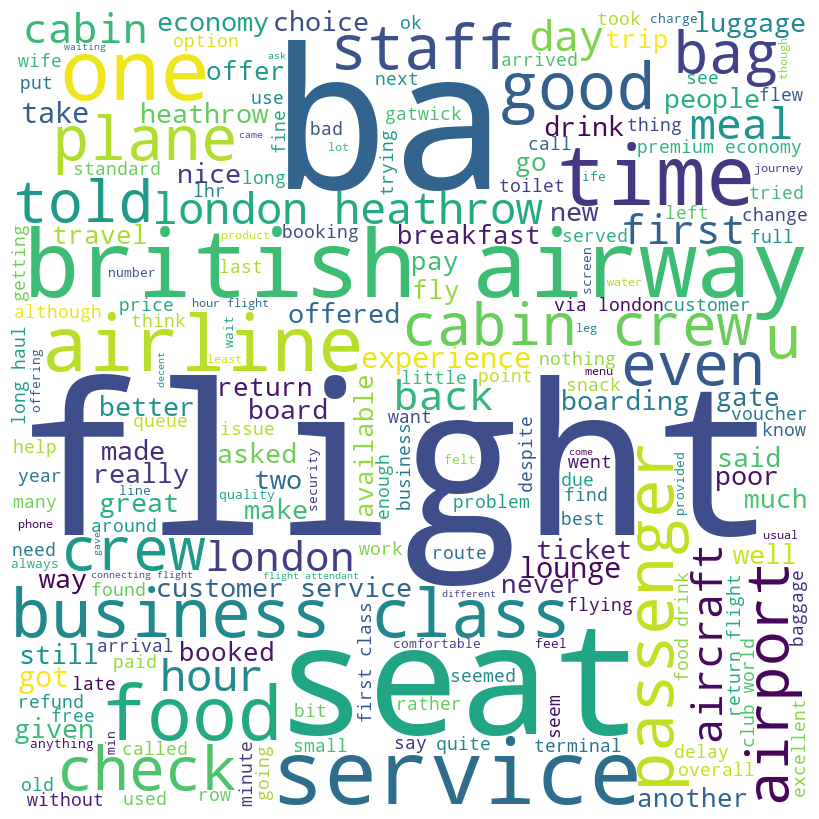

In [16]:
# Combine all tokenized reviews into a single list of words
all_words = [word for tokens in df["tokenized_reviews"] for word in tokens]

# Load NLTK stopwords
stop_words = set(nltk.corpus.stopwords.words("english"))

# Filter out stopwords from the list of words
filtered_words = [word for word in all_words if word not in stop_words]

# Create a string from the filtered words
wordcloud_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(wordcloud_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



Creating Pie Chart

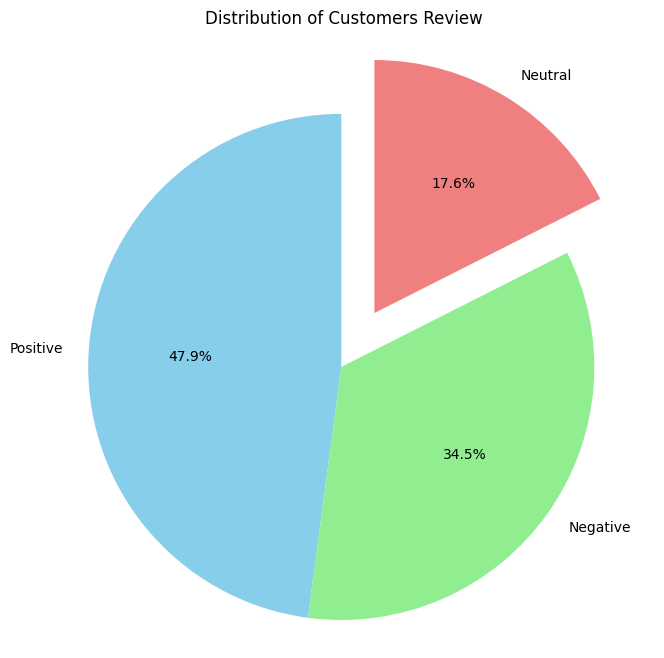

In [17]:
# Counting the number of customers in each industry category
reviews = df['sentiment_label'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(reviews, labels=reviews.index, startangle=90, colors = ['skyblue', 'lightgreen', 'lightcoral']
,explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.title('Distribution of Customers Review')

# Displaying the chart
plt.axis('equal')
plt.show()


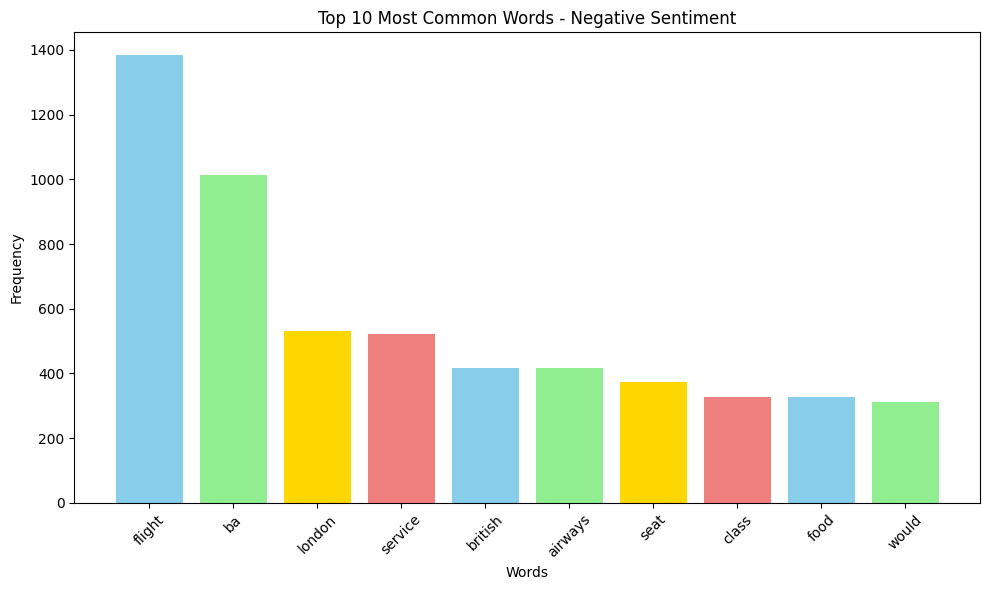

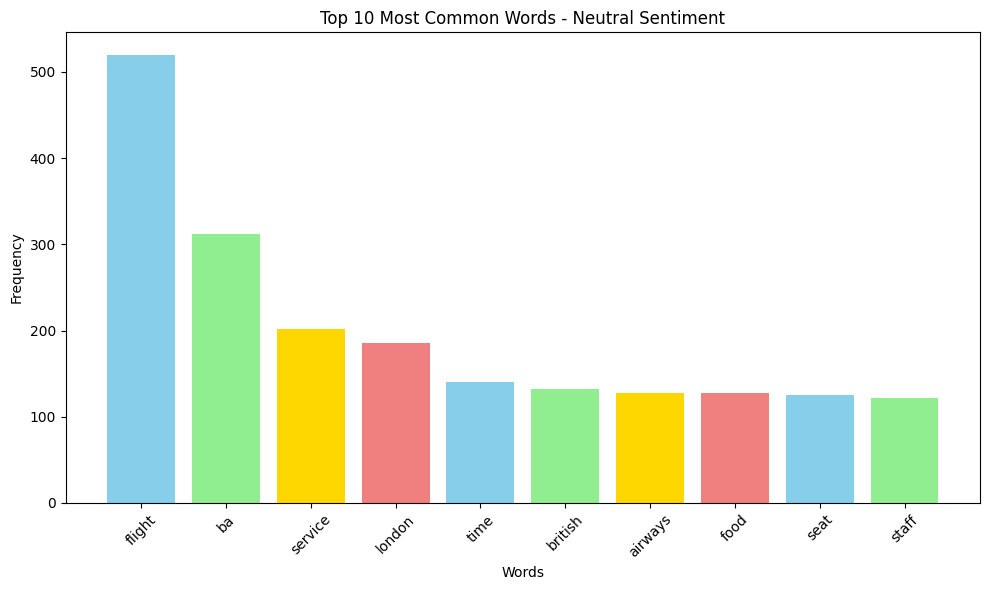

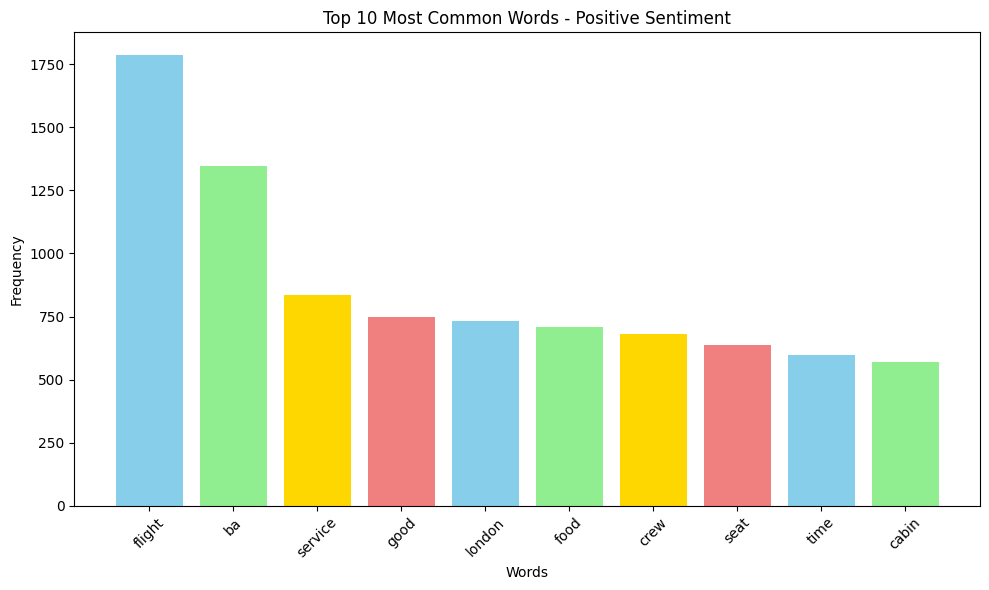

In [21]:
# Count word frequencies for each sentiment category
word_counts = {}
for sentiment in df["sentiment_label"].unique():
    reviews = df[df["sentiment_label"] == sentiment]["tokenized_reviews"]
    all_words = [word for tokens in reviews for word in tokens]
    word_counts[sentiment] = Counter(all_words)

# Plot word frequency for each sentiment category
for sentiment, counts in word_counts.items():
    plt.figure(figsize=(10, 6))
    common_words = counts.most_common(10)  # Get the top 10 most common words
    words, frequencies = zip(*common_words)
    
    plt.bar(words, frequencies, color=['skyblue', 'lightgreen', 'gold', 'lightcoral'])
    plt.title(f"Top 10 Most Common Words - {sentiment} Sentiment")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()